In [49]:
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
import json
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14
from IPython.display import Image

In [50]:
#filename = '04_Hinged_roof_disp.dat'

In [51]:
def readData(filename):
    
    file=open(filename,'r') 
    row = file.readlines()
    
    disp = []
    force = []
    
    state = 0

    for line in row:
        strlist = line.split()
        if 'U2' in strlist:
            state = 1
        elif 'RF2' in strlist:
            state = 2
        elif '289' in strlist:
            if state == 1:
                disp.append(float(strlist[2]))
                state = 0
            if state == 2:
                force.append(float(strlist[2]))
                state = 0
    da = -np.array(disp)
    fa = -np.array(force)
    
    return da, fa


In [52]:
d1, f1 = readData('./L04data/disp40_1000.dat')
d2, f2 = readData('./L04data/disp50_10.dat')
d3, f3 = readData('./L04data/disp60_10.dat')

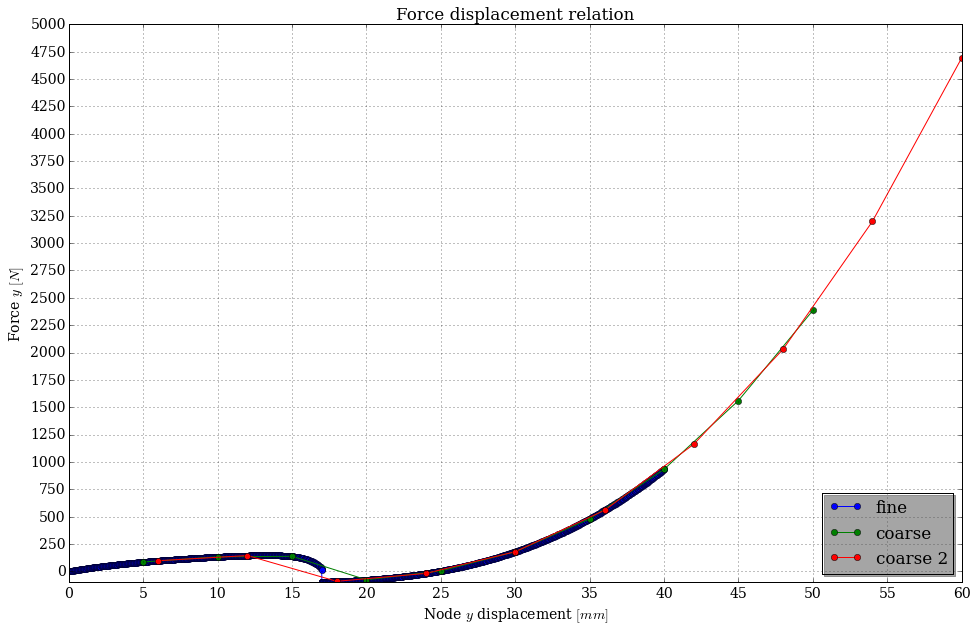

In [56]:
maxD = 60.0
maxF = 5000.
plt.figure(figsize=(16,10), dpi=300)

plt.plot(d1,f1, 'o-', label='fine')
plt.plot(d2,f2, 'o-', label='coarse')
plt.plot(d3,f3, 'o-', label='coarse 2')

plt.xlim([0,maxD])
plt.ylim([-100,maxF])
plt.xticks(np.arange(0.0,maxD+1,5))
plt.yticks(np.arange(0.0,maxF+.5,250))
plt.title('Force displacement relation')
plt.xlabel('Node $y$ displacement $[mm]$')
plt.ylabel('Force $y$ $[N]$')
plt.legend(loc='lower right', shadow=True)
plt.grid()
plt.savefig('Lab04.jpg')